# Quality Control Reports
Create a report quality checking an individual unit. Unit exclusion criteria:

- firing rate < 0.15 Hz
- presence ration < 50%
- any bad unit identified from visual inspection


In [1]:
# Imports
from convnwb.io import load_nwbfile

...

Ellipsis

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

from convnwb.io import load_nwbfile
from convnwb.io import get_files, save_json

from spiketools.measures.trials import compute_segment_frs
from spiketools.measures.spikes import compute_firing_rate
from spiketools.utils.extract import get_range
from spiketools.utils.epoch import epoch_spikes_by_range, epoch_spikes_by_event
from spiketools.plts.utils import save_figure

In [3]:
config Completer.use_jedi = False

In [4]:
import sys
sys.path.append('../code')
from plts import plot_spikes_trial

## Settings

In [5]:
# Define the base data folder
data_folder = '/Users/weijiazhang/Data/Train_NWB'
# Define subject information
session = {
    'experiment' : 'TRAIN',
    'subject' : 'R1219C',
    'session' : 0    
}

In [30]:
# Set which example unit to extract
uind = 3

## Load Data

In [31]:
# Load NWB file
nwbfile = load_nwbfile(session, data_folder)

In [32]:
# Get the list of NWB files
nwbfiles = get_files(data_folder)
nwbfiles

['TRAIN_R1219C_session_0.nwb']

In [33]:
nwbfile.trials

trials pynwb.epoch.TimeIntervals at 0x6120982368
Fields:
  colnames: ['start_time' 'stop_time' 'drive_type' 'feedback_start_time'
 'feedback_stop_time' 'fixation_start_time' 'fixation_stop_time'
 'hold_start_time' 'hold_stop_time' 'movement_start_time'
 'movement_stop_time' 'object' 'object_position' 'response_error'
 'response_position' 'response_time' 'trial_type']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    drive_type <class 'hdmf.common.table.VectorData'>,
    feedback_start_time <class 'hdmf.common.table.VectorData'>,
    feedback_stop_time <class 'hdmf.common.table.VectorData'>,
    fixation_start_time <class 'hdmf.common.table.VectorData'>,
    fixation_stop_time <class 'hdmf.common.table.VectorData'>,
    hold_start_time <class 'hdmf.common.table.VectorData'>,
    hold_stop_time <class 'hdmf.common.table.VectorData'>,
    movement_start_time <class 'hdmf.common.table.VectorData'>,
    movement_sto

In [34]:
# Get the trail information
trial_starts = nwbfile.trials.start_time[:]
trial_ends = nwbfile.trials.stop_time[:]
hold_starts = nwbfile.trials.hold_start_time[:]
hold_stops = nwbfile.trials.hold_stop_time[:]
movement_start= nwbfile.trials.movement_start_time[:]
movement_end= nwbfile.trials.movement_stop_time[:]
fixation_start= nwbfile.trials.fixation_start_time[:]
fixation_end= nwbfile.trials.fixation_stop_time[:]
feedback_start= nwbfile.trials.feedback_start_time[:]
feedback_end= nwbfile.trials.feedback_stop_time[:]
response_time= nwbfile.trials.response_time[:]


In [35]:
# Reset movement stops per trial
movement_stops_trial = [movement_end[ind] - movement_start[ind] for ind in range(len(movement_end))]


In [36]:
# Get the spikes
spikes = nwbfile.units.get_unit_spike_times(uind)
spikes

array([3.60233333e-01, 4.21733333e-01, 4.43766667e-01, ...,
       2.34065460e+03, 2.34067523e+03, 2.34068313e+03])

## Example unit

In [37]:
# Epoch & reset spikes within each movement period per trial
name = nwbfile.session_id + '_U' + str(uind).zfill(2)
spikes_trial = epoch_spikes_by_range(spikes, movement_start, movement_end, reset=True)

In [38]:
# Compute the firing rate per trial
movement_spikes = []
frs = np.zeros(len(spikes_trial))
for ind in range(len(spikes_trial)): 
    t_spikes = get_range(spikes, movement_start[ind],movement_end[ind])
    movement_spikes.append(t_spikes)
    movement_spikes_all = np.concatenate(movement_spikes).ravel()
    
    frs[ind] = compute_firing_rate(spikes_trial[ind])

In [39]:
movement_spikes_all

array([3.60233333e-01, 4.21733333e-01, 4.43766667e-01, ...,
       2.16846363e+03, 2.16860103e+03, 2.16867207e+03])

In [40]:
# Define hlines
hlines = [7.5, 15.5]
movement_start= list(movement_start)

movement_end= list(movement_end)
response_time = list(response_time)

Figure1: 
- blue: cell firing
- orange:movement start
- purple: movement period end

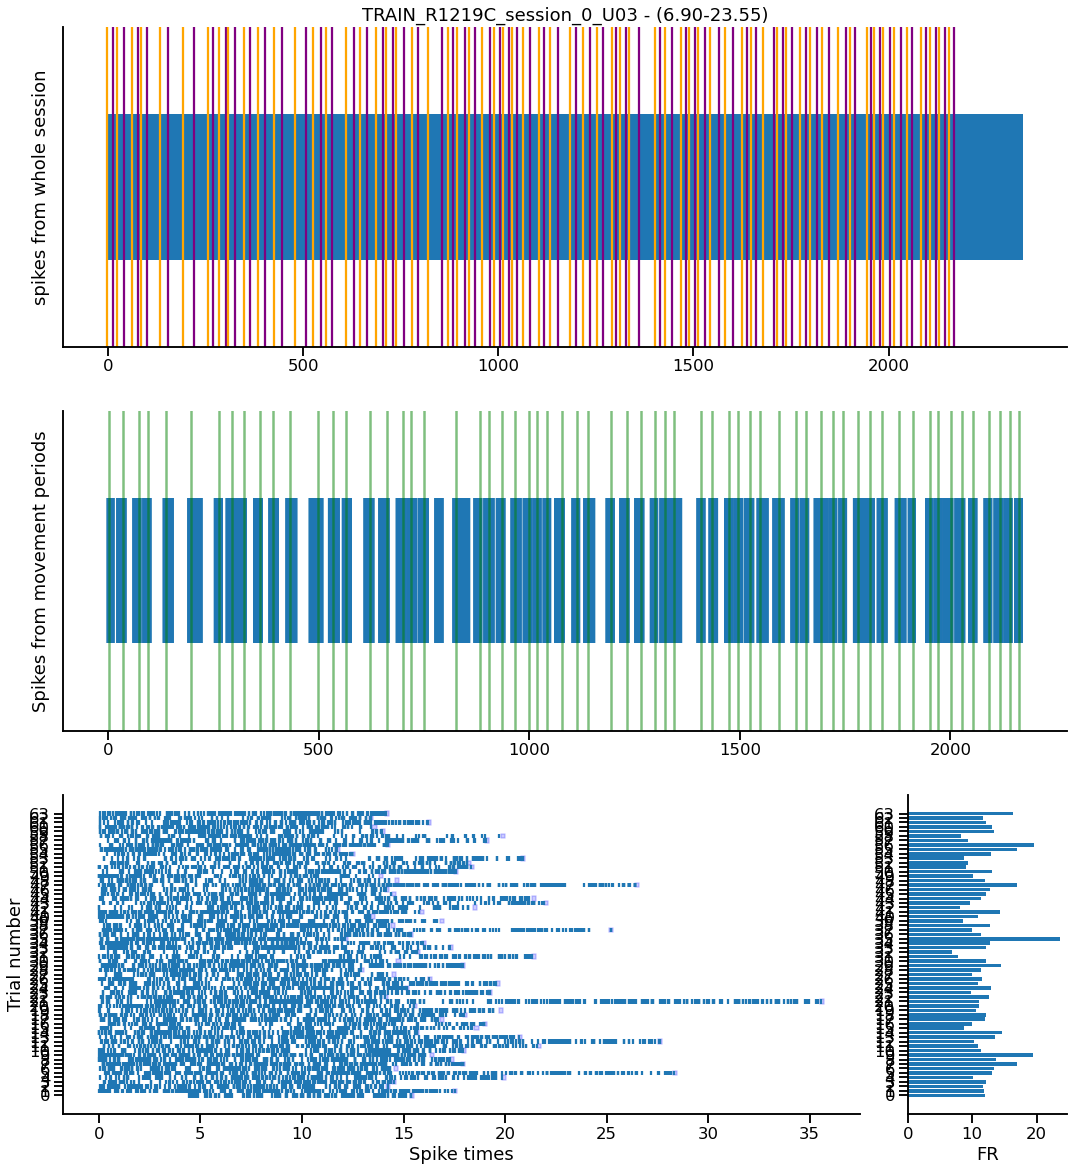

In [41]:
# Plot the unit report for one example unit 
plot_spikes_trial(spikes, spikes_trial, movement_spikes_all, movement_start, movement_end, 
                  movement_stops_trial, response_time, frs, name, hlines)